In [39]:
import pandas as pd
import random
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [40]:
df = pd.read_csv('heart_disease(in).csv')
print(df.head)

<bound method NDFrame.head of                                          age  sex  painloc  painexer  relrest  \
0                                         63  1.0      NaN       NaN      NaN   
1                                         67  1.0      NaN       NaN      NaN   
2                                         67  1.0      NaN       NaN      NaN   
3                                         37  1.0      NaN       NaN      NaN   
4                                         41  0.0      NaN       NaN      NaN   
...                                      ...  ...      ...       ...      ...   
1056  1 888 -9 4016 8216 8216 788 0 -9 -9 -9  NaN      NaN       NaN      NaN   
1057      -0 0 0 1 9 -9 130 80 0 130 80 0 11  NaN      NaN       NaN      NaN   
1058                     -9 3 1h9 1 -9 -9 -9  NaN      NaN       NaN      NaN   
1059                           -9 3 -9 -9 -9  NaN      NaN       NaN      NaN   
1060                    -9 -9 -9 3 -9 -4 1 1  NaN      NaN       NaN      NaN  

In [41]:
#find out which columns in need of imputation

missing_values_count = df.isnull().sum()
# Filter out columns that have any missing values
columns_with_missing_values = missing_values_count[missing_values_count > 0]
# Print the columns with their missing value counts
print(columns_with_missing_values)

age              2
sex            162
painloc        444
painexer       444
relrest        448
pncaden       1061
cp             162
trestbps       221
htn            196
chol           192
smoke          831
cigs           582
years          594
fbs            252
dm             966
famhist        584
restecg        164
ekgmo          215
ekgday(day     216
ekgyr          215
dig            230
prop           228
nitr           227
pro            225
diuretic       244
proto          274
thaldur        218
thaltime       615
met            267
thalach        217
thalrest       218
tpeakbps       225
tpeakbpd       225
dummy          221
trestbpd       221
exang          217
xhypo          220
oldpeak        224
slope          470
rldv5          587
rldv5e         304
ca             770
restckm       1061
exerckm       1060
restef        1033
restwm        1031
exeref        1059
exerwm        1056
thal           639
thalsev        931
thalpul       1017
earlobe       1060
cmo         

In [42]:
#starting imputation:
# Creating imputers
median_imputer = SimpleImputer(strategy='median')
mode_imputer = SimpleImputer(strategy='most_frequent')


IMPUTATION AND ANALYSIS OF FEATURES

**Age** has numerical data, so we will use median imputation to fill in the 2 missing values

**Sex** has categorical data, so we will use mode imputation technique to fill in the missing data

**trestbps** and **trestbpd** have numerical values, so we will use median imputation since the feature tends to stay similar for populations of people (except for outliers). Moreover, some values in these columns have incorrect string values. We first convert these values to null then remove those rows.

**cp** also has 4 categories (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic), hence it's categorical and will use mode amputation



In [44]:

# Convert columns to string temporarily to check for non-numeric characters
df['trestbps'] = df['trestbps'].astype(str)
df['trestbpd'] = df['trestbpd'].astype(str)

# Check for rows containing non-digit/non-decimal characters
# We use a regex pattern that matches any character that is not a digit or a decimal point
problematic_trestbps = df['trestbps'].str.contains(r'[^\d.]', regex=True, na=False)
problematic_trestbpd = df['trestbpd'].str.contains(r'[^\d.]', regex=True, na=False)

# Combine the problematic conditions
problematic_rows = problematic_trestbps | problematic_trestbpd
# Remove problematic rows from the DataFrame
df = df[~problematic_rows]

# Convert columns back to numeric types, this time ignoring non-convertible types which should now be absent
df['trestbps'] = pd.to_numeric(df['trestbps'], errors='coerce')
df['trestbpd'] = pd.to_numeric(df['trestbpd'], errors='coerce')


numeric_columns = ['age', 'trestbps']  # Add more as needed
categorical_columns = ['sex', 'cp']  # Add more as needed

# Applying median imputation
df[numeric_columns] = median_imputer.fit_transform(df[numeric_columns])

# Applying mode imputation
df[categorical_columns] = mode_imputer.fit_transform(df[categorical_columns])

**painloc**, **painexer**, and **relrest** are all categorical data with about a quarter of values missing. We will use mode amputation for all of them

In [45]:
# Columns to impute
categ_columns = ['painloc', 'painexer', 'relrest']

# Applying mode imputation
df[categ_columns] = mode_imputer.fit_transform(df[categ_columns])

For **ekgday**, **ekgmo**, and **ekgyear** we first plot histograms to see if there's a tendency towards specific days, months or years.

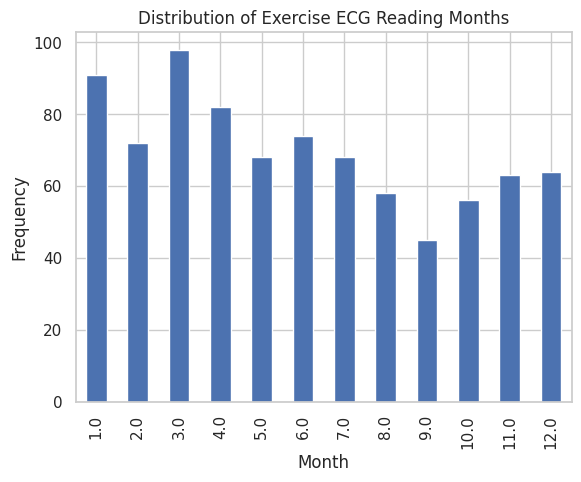

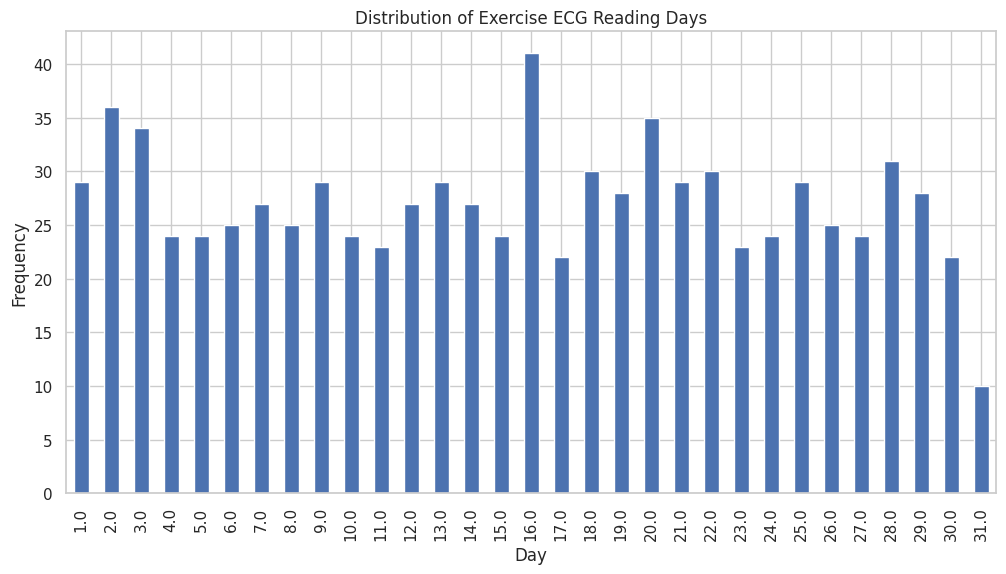

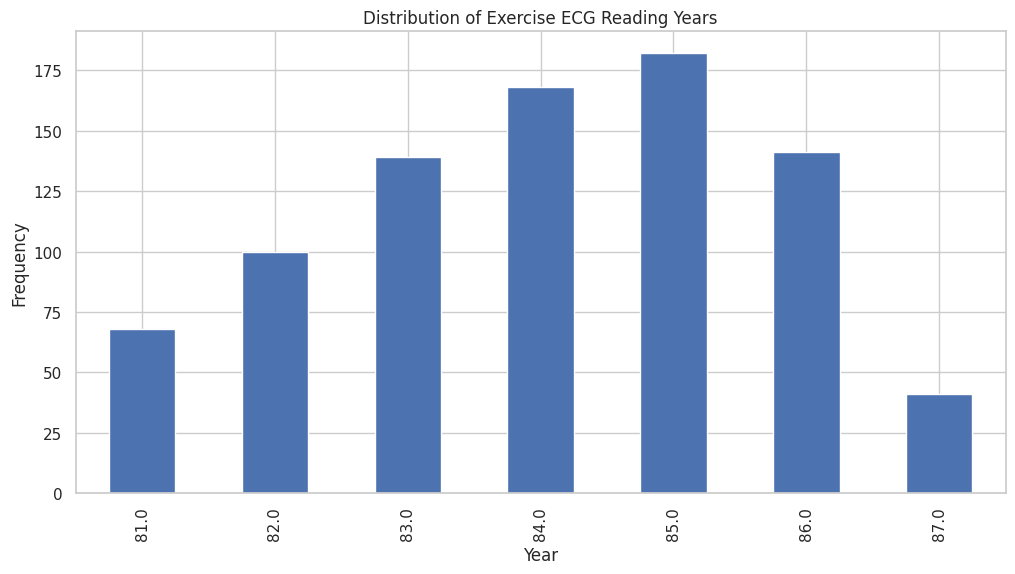

In [46]:

# Plot the distribution of ekgmo
df['ekgmo'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Exercise ECG Reading Months')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of ekgday
df['ekgday(day'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.title('Distribution of Exercise ECG Reading Days')
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of ekgyr
df['ekgyr'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.title('Distribution of Exercise ECG Reading Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

#We'll use median imputation since there's no specific periods with more data points.
ordinal_columns = ['ekgmo', 'ekgday(day', 'ekgyr']
df[ordinal_columns] = mode_imputer.fit_transform(df[ordinal_columns])


**htn, fbs, famhist, dig, prop, nitr, pro, diuretic, proto** are categorical values

**chol, cigs, years, thaldur, thaltime , met, thalach, thalrest, tpeakbps, tpeakbpd** are numerical



In [47]:
categ = ['htn', 'fbs', 'dig', 'prop', 'nitr', 'pro', 'diuretic', 'proto']
num = ['chol', 'cigs',  'years', 'thaldur' , 'met', 'thalach', 'thalrest', 'tpeakbps', 'tpeakbpd']

df[categ] = mode_imputer.fit_transform(df[categ])
df[num] = median_imputer.fit_transform(df[num])


**ca, cmo, cday, cyr, oldpeak** have numerical values and will use median imputation

**exang, xhypo, slope** are categorical values and use mode imputation.


In [48]:
categs = ['exang', 'xhypo', 'slope','ca']
nums = ['cmo', 'cday', 'cyr', 'oldpeak']
df[nums] = median_imputer.fit_transform(df[nums])
df[categs] = mode_imputer.fit_transform(df[categs])

Several features are not included in the cleaned dataset. Features like rldv5, rldv5e are irrelevant in determining heart disease

Other features like restckm, restef, thaltime and more had too many missing values (more than approximately ~50% values) which would likely produce inaccurate models if we were to use the normal imputation methods.

**IDENTIFYING OUTLIERS IN NUMERICAL VALUES**

We will set up box plots for numerical values to visualize the distributions and possible outliers

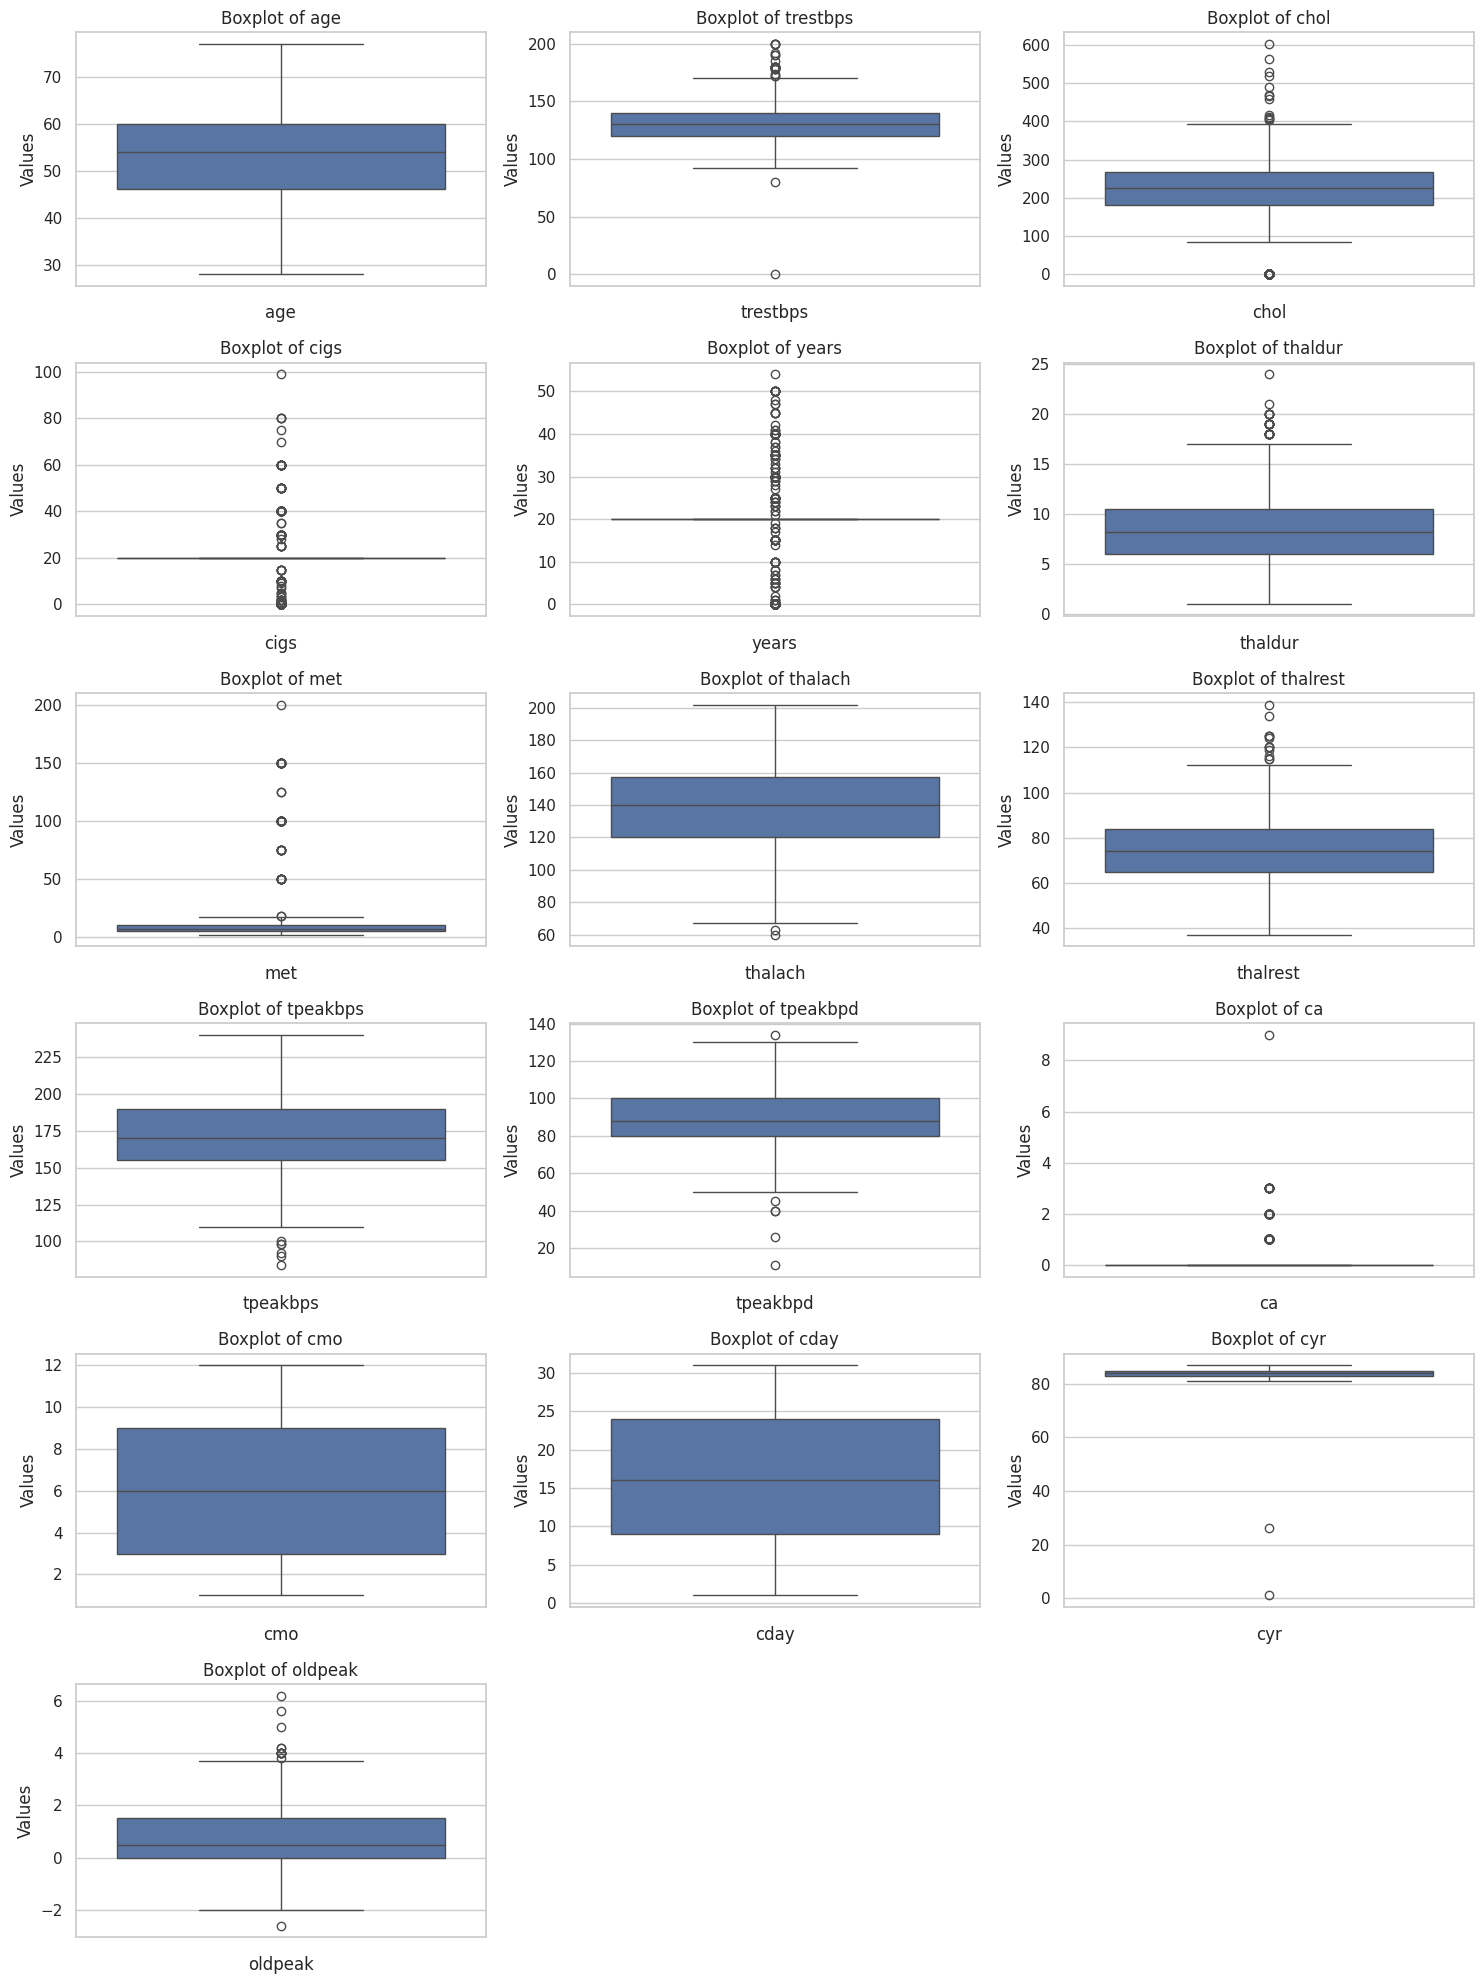

In [49]:
#NUMERIC BOXPLOTS

all_numeric_columns = ['age', 'trestbps', 'chol', 'cigs', 'years', 'thaldur' , 'met', 'thalach', 'thalrest', 'tpeakbps', 'tpeakbpd',
                   'ca', 'cmo', 'cday', 'cyr', 'oldpeak']

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating a figure to manage size and layout
plt.figure(figsize=(15, 20))

# Number of subplots required (one for each column)
total_columns = len(all_numeric_columns)
rows = (total_columns // 3) + 1  # arranging plots in 3 columns

# Create a boxplot for each numeric column
for index, column in enumerate(all_numeric_columns):
    plt.subplot(rows, 3, index + 1)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)  # Optional: often not needed as y-label is clear
    plt.ylabel('Values')  # Optional: same reason as above

# Adjust layout to prevent overlap and ensure everything fits
plt.tight_layout()

# Show the plot
plt.show()

Using capping transformation for trestbps. This is because the minimum possible value of trestbps is 90 mm Hg and the maximum is 200 mm Hg

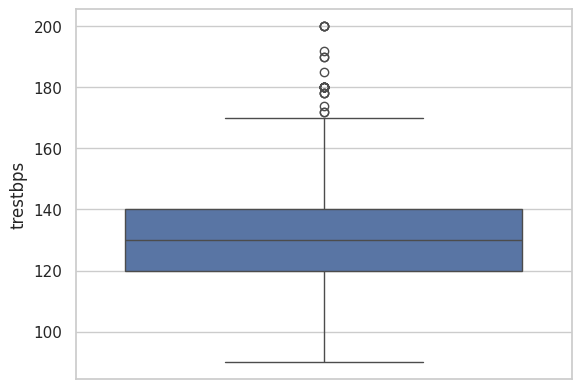

In [50]:
# This will cap the values at 90 on the lower end and 200 on the higher end.
df['trestbps'] = df['trestbps'].clip(lower=90, upper=200)
sns.boxplot(y=df['trestbps'])
plt.show()

For the chol feature, we'll create a new feature that places the the data into one of the three categories:
0 - Desirable: Less than 200 mg/dL
1 - Borderline high: 200 to 239 mg/dL
2 - High: 240 mg/dL and above

In [51]:
# Define a function that categorizes cholesterol levels.
def categorize_cholesterol(chol_level):
    if chol_level < 200:
        return 0  # Desirable
    elif 200 <= chol_level < 240:
        return 1  # Borderline high
    else:
        return 2  # High

# Apply the function to the 'chol' column to create a new categorical feature.
df['chol_category'] = df['chol'].apply(categorize_cholesterol)


For the thaldur function, we will cap values using interquartile range because there's a specific limit for the amount of time taken for exercise.



<Axes: ylabel='thaldur_capped'>

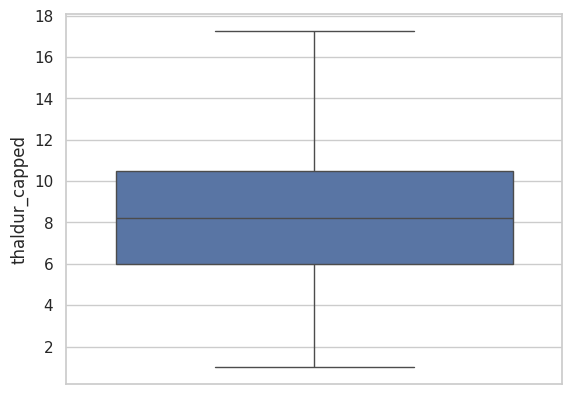

In [52]:
# # Calculate the 99th percentile.
# cap_value = df['thaldur'].quantile(0.99)

# # Cap values at the 99th percentile.
# df['thaldur_capped'] = df['thaldur'].clip(upper=cap_value)
# sns.boxplot(y=df['thaldur_capped'])

# Calculate Q1 and Q3.
Q1 = df['thaldur'].quantile(0.25)
Q3 = df['thaldur'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the upper bound as Q3 + 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap values at the upper bound.
df['thaldur_capped'] = df['thaldur'].clip(upper=upper_bound)

sns.boxplot(y=df['thaldur_capped'])

Met will be given a new categorical feature that determines 3 categories within it:

1 - Low: METs below a certain threshold (e.g., less than 10)
2 - Medium: METs within a typical range (e.g., 10-12)
3 - High: METs above the typical range (e.g., greater than 12)

In [53]:
# Define thresholds for METs levels (these are hypothetical and should be adjusted as necessary).
low_threshold = 10
high_threshold = 12

# Define a function that categorizes METs achieved.
def categorize_met(met_value):
    if met_value < low_threshold:
        return 1  # Low exercise capacity
    elif low_threshold <= met_value <= high_threshold:
        return 2  # Medium exercise capacity
    else:
        return 3  # High exercise capacity

# Apply the function to the 'met' column to create a new categorical feature.
df['met_category'] = df['met'].apply(categorize_met)

Capping met feature because the value shouldn't exceed 3
We won't remove the outliers because they are all viable value options for the feature.

<Axes: ylabel='ca_capped'>

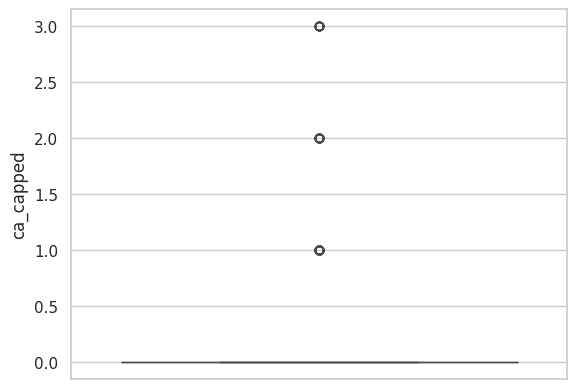

In [54]:
upper_bound = 3
def cap_ca(caval):
  if caval > 3:
    return 3
  else: return caval
df['ca_capped'] = df['ca'].apply(cap_ca)
# sns.boxplot(y=df['ca_capped'])

# # Calculate the 99th percentile.
# cap_value = df['ca'].quantile(0.99)

# # Cap values at the 99th percentile.
# df['ca_capped'] = df['ca'].clip(upper=cap_value)
sns.boxplot(y=df['ca_capped'])

cyr will be capped using interquartile range technique, because the outliers are likely to be erroneous because it's highly unlikely that a cardiac catheterization procedure to have been performed in the first 30 years of a person's life.

<Axes: ylabel='cyr_capped'>

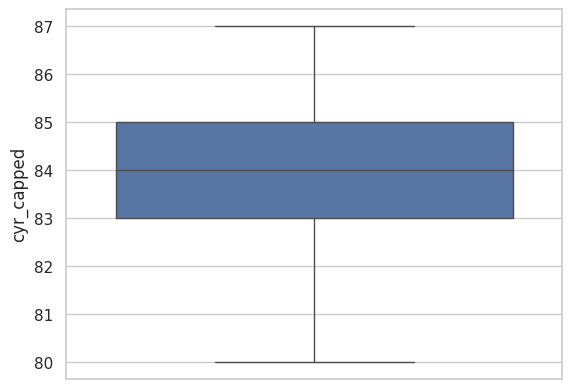

In [55]:
# Calculate Q1 and Q3.
Q1 = df['cyr'].quantile(0.25)
Q3 = df['cyr'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the upper bound as Q3 + 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
lower_bound =Q1 - 1.5*IQR

# Cap values at the upper bound.
df['cyr_capped'] = df['cyr'].clip(lower=lower_bound)

sns.boxplot(y=df['cyr_capped'])

For oldpeak, we will cap using interquartile range to accomodate for extremities while avoiding erroneous errors

<Axes: ylabel='oldpeak_capped'>

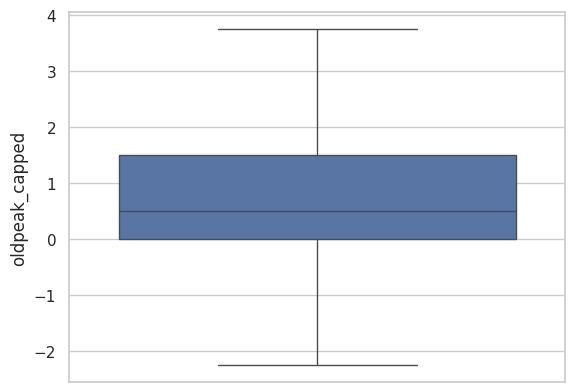

In [56]:
# Calculate Q1 and Q3.
Q1 = df['oldpeak'].quantile(0.25)
Q3 = df['oldpeak'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the upper bound as Q3 + 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
lower_bound =Q1 - 1.5*IQR

# Cap values at the upper bound.
df['oldpeak_capped'] = df['oldpeak'].clip(lower=lower_bound, upper= upper_bound)

sns.boxplot(y=df['oldpeak_capped'])

For cigs, we will do the 99th percentile since the number of cigarettes people consume per ay can hugely vary, and yet we want too avoid erroneous values.

<Axes: ylabel='cigs_capped'>

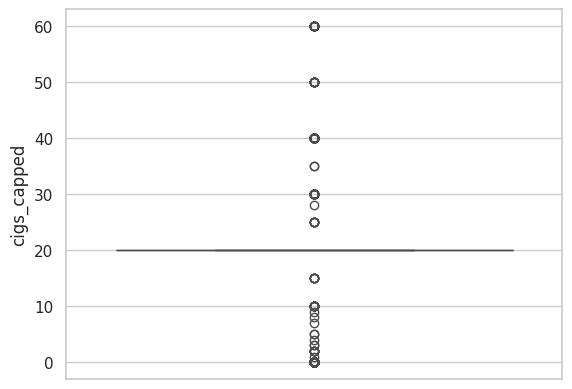

In [57]:
# Calculate the 99th percentile.
cap_value = df['cigs'].quantile(0.99)

# Cap values at the 99th percentile.
df['cigs_capped'] = df['cigs'].clip(upper=cap_value)
sns.boxplot(y=df['cigs_capped'])


Correlations between the number of cigarettes per day with other variables
 Note that people who consume a lot of cigarettes have a higher blood pressure, and it's most significant to the extremeties


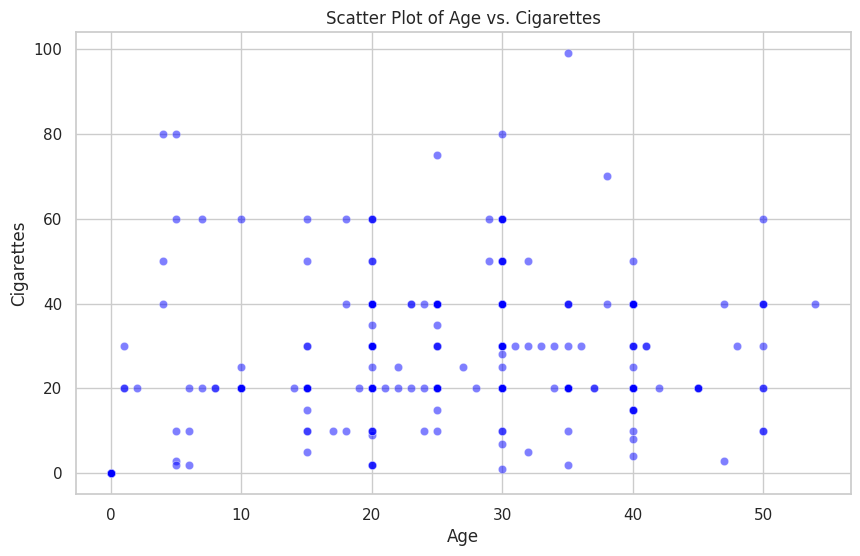

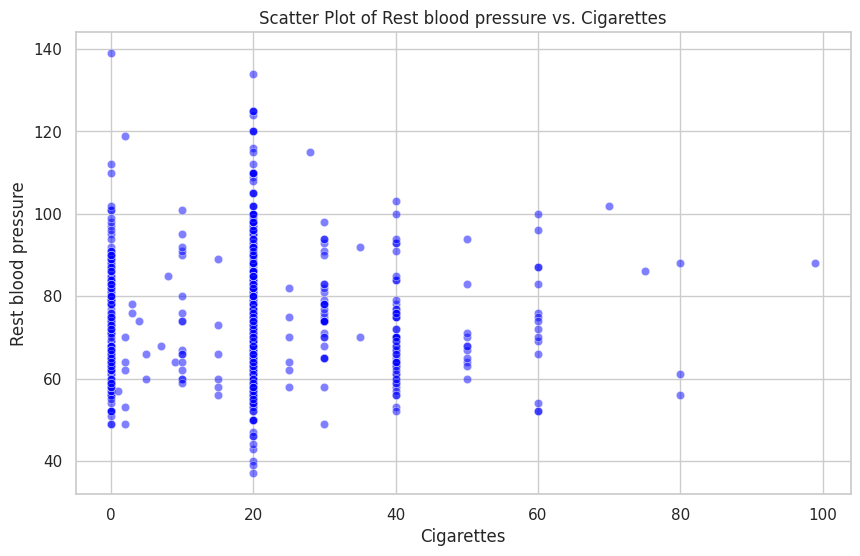

In [58]:
#making scatterplots

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='years', y='cigs', data=df, color='blue', alpha=0.5)
plt.title('Scatter Plot of Age vs. Cigarettes')
plt.xlabel('Age')
plt.ylabel('Cigarettes')
plt.grid(True)
plt.show()

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cigs', y='thalrest', data=df, color='blue', alpha=0.5)
plt.title('Scatter Plot of Rest blood pressure vs. Cigarettes')
plt.ylabel('Rest blood pressure')
plt.xlabel('Cigarettes')
plt.grid(True)
plt.show()

There's no visible trend in age versus the variables, but it is worth noting the dataset constitutes mostly of middle-aged people.

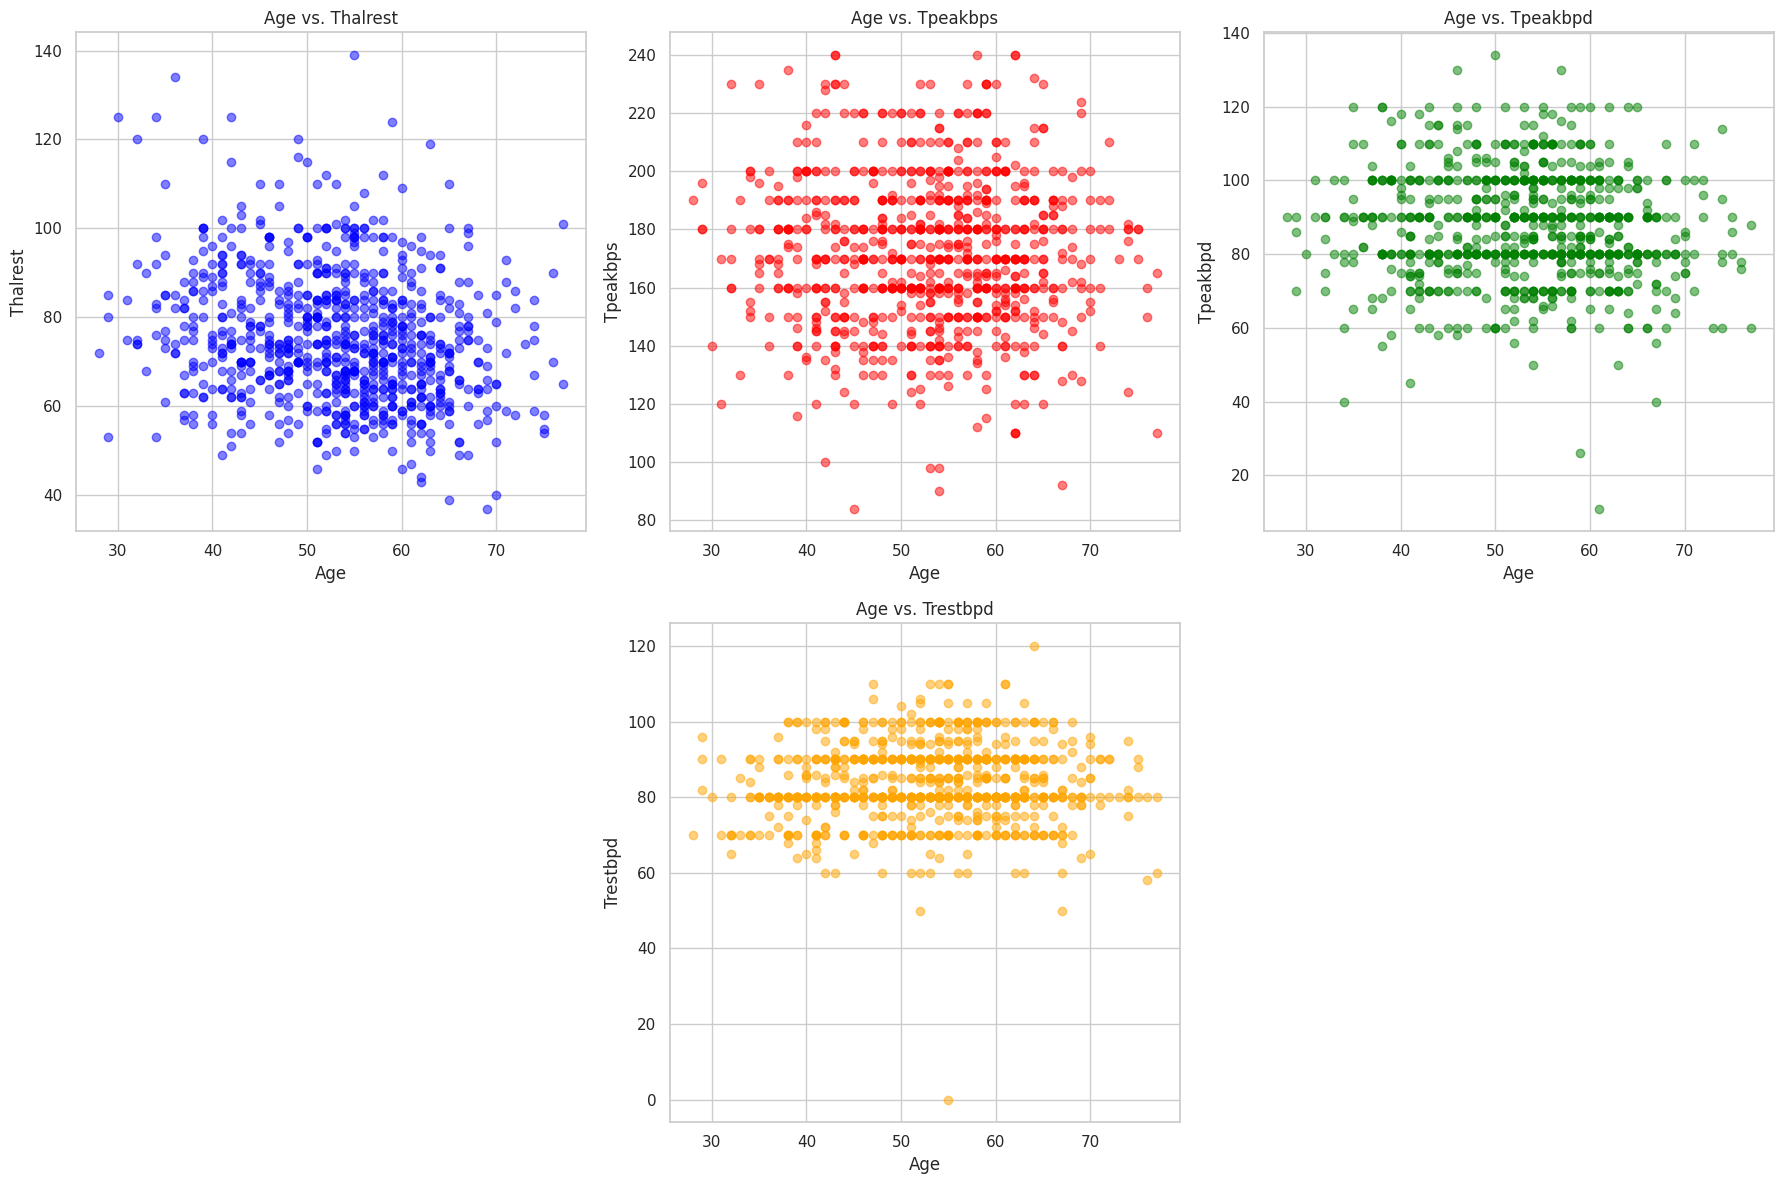

In [59]:


# Create scatter plots
plt.figure(figsize=(18, 12))

# Scatter plot for 'thalrest'
plt.subplot(2, 3, 1)
plt.scatter(df['age'], df['thalrest'], color='blue', alpha=0.5)
plt.title('Age vs. Thalrest')
plt.xlabel('Age')
plt.ylabel('Thalrest')

# Scatter plot for 'tpeakbps'
plt.subplot(2, 3, 2)
plt.scatter(df['age'], df['tpeakbps'], color='red', alpha=0.5)
plt.title('Age vs. Tpeakbps')
plt.xlabel('Age')
plt.ylabel('Tpeakbps')

# Scatter plot for 'tpeakbpd'
plt.subplot(2, 3, 3)
plt.scatter(df['age'], df['tpeakbpd'], color='green', alpha=0.5)
plt.title('Age vs. Tpeakbpd')
plt.xlabel('Age')
plt.ylabel('Tpeakbpd')


# Scatter plot for 'trestbpd'
plt.subplot(2, 3, 5)
plt.scatter(df['age'], df['trestbpd'], color='orange', alpha=0.5)
plt.title('Age vs. Trestbpd')
plt.xlabel('Age')
plt.ylabel('Trestbpd')

plt.tight_layout()
plt.show()

Finally, the following scatter plots show the different correlations between several other variables. Most don't have a direct correlation and data varies greatly between variables.

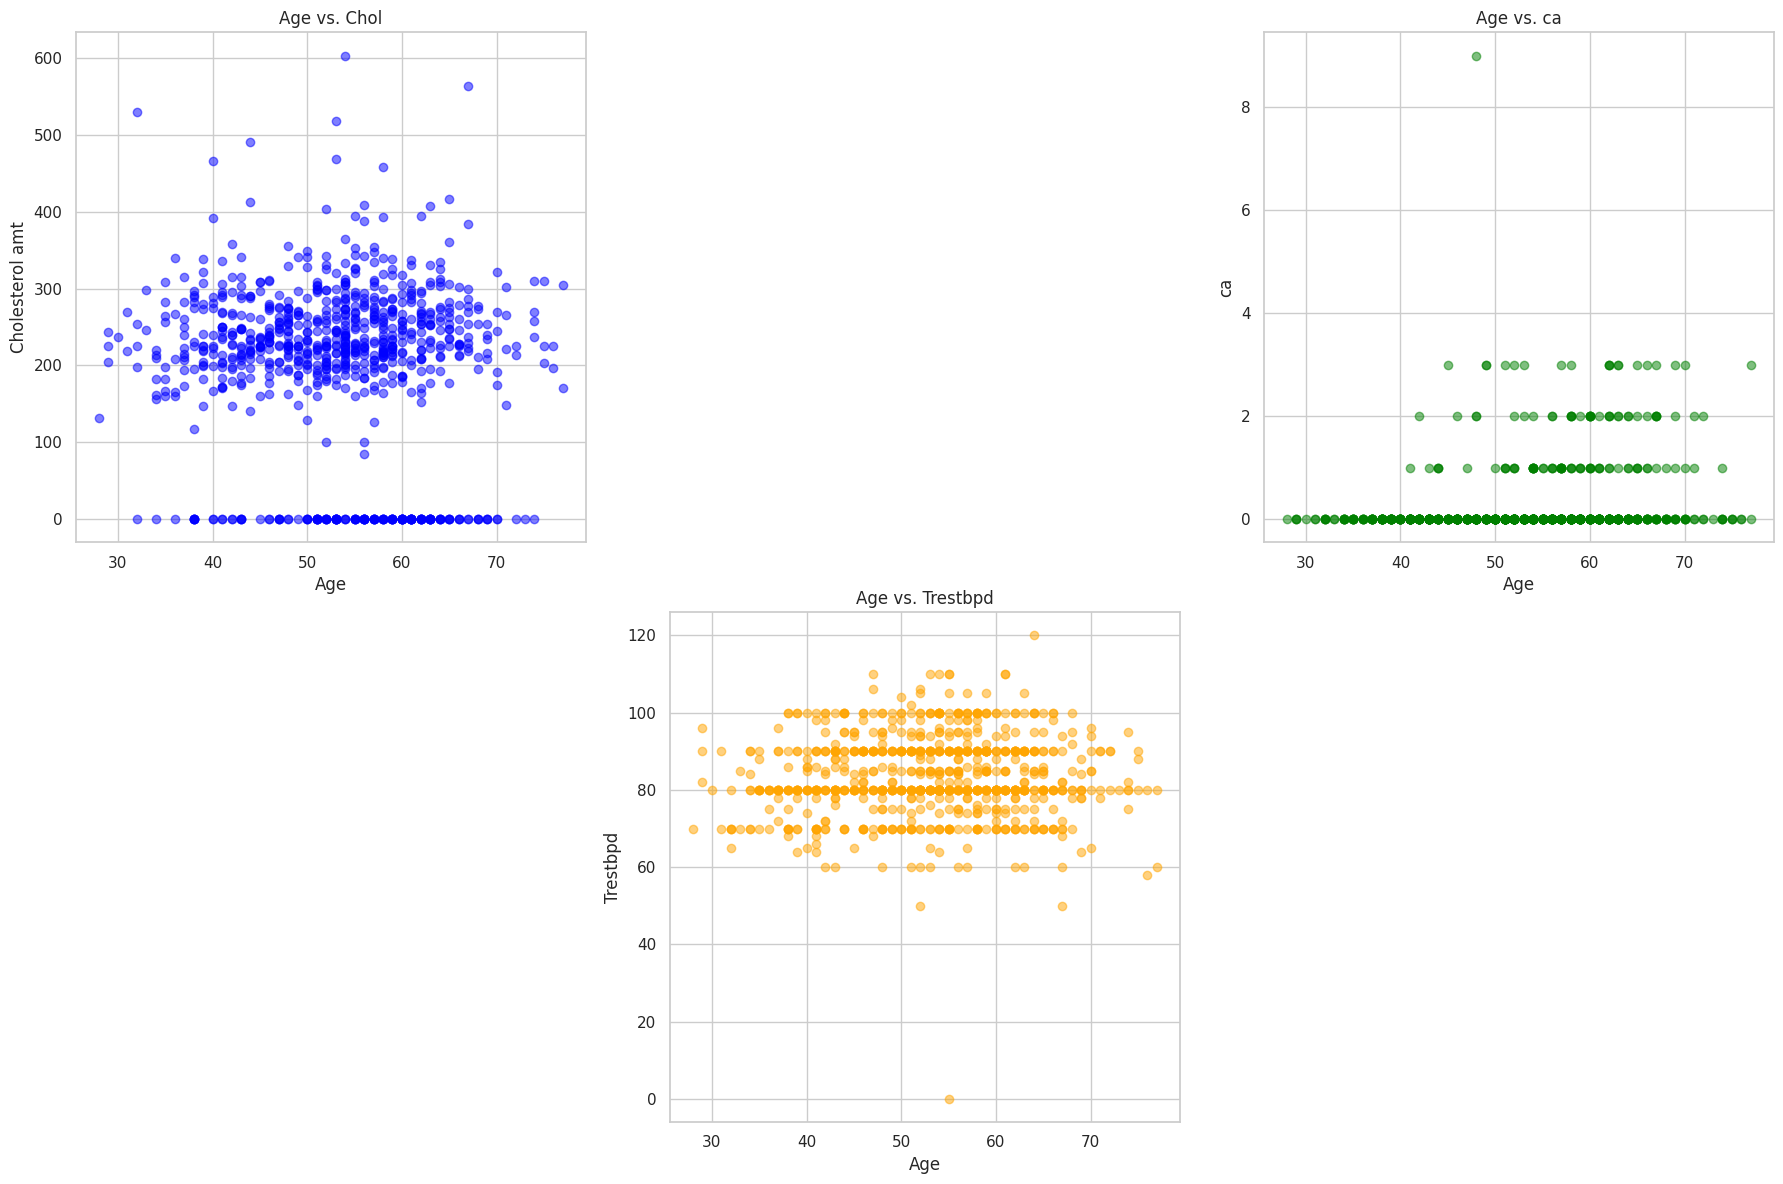

In [60]:
# Create scatter plots
plt.figure(figsize=(18, 12))

# Scatter plot for 'thalrest'
plt.subplot(2, 3, 1)
plt.scatter(df['age'], df['chol'], color='blue', alpha=0.5)
plt.title('Age vs. Chol')
plt.xlabel('Age')
plt.ylabel('Cholesterol amt')


# Scatter plot for 'tpeakbpd'
plt.subplot(2, 3, 3)
plt.scatter(df['age'], df['ca'], color='green', alpha=0.5)
plt.title('Age vs. ca')
plt.xlabel('Age')
plt.ylabel('ca')


# Scatter plot for 'trestbpd'
plt.subplot(2, 3, 5)
plt.scatter(df['age'], df['trestbpd'], color='orange', alpha=0.5)
plt.title('Age vs. Trestbpd')
plt.xlabel('Age')
plt.ylabel('Trestbpd')

plt.tight_layout()
plt.show()

In [61]:
#statistics

# Get summary statistics
statistics = df.describe()

# Print the statistics
print(statistics)

              age         sex     painloc    painexer     relrest  pncaden  \
count  840.000000  840.000000  840.000000  840.000000  840.000000      0.0   
mean    53.088095    0.778571    0.950000    0.735714    0.777381      NaN   
std      9.393115    0.415456    0.218075    0.441215    0.416252      NaN   
min     28.000000    0.000000    0.000000    0.000000    0.000000      NaN   
25%     46.000000    1.000000    1.000000    0.000000    1.000000      NaN   
50%     54.000000    1.000000    1.000000    1.000000    1.000000      NaN   
75%     60.000000    1.000000    1.000000    1.000000    1.000000      NaN   
max     77.000000    1.000000    1.000000    1.000000    1.000000      NaN   

               cp    trestbps         htn        chol  ...        cday  \
count  840.000000  840.000000  840.000000  840.000000  ...  840.000000   
mean     3.254762  132.220238    0.459524  200.475000  ...   15.963095   
std      0.929891   18.626377    0.498656  109.932038  ...    8.836338   
m

Finally, removing all the unwanted columns

In [62]:
# List of columns to remove
columns_to_drop = ['pncaden', 'dm', 'thaltime', 'restckm', 'exerckm',
                   'restef', 'restwm', 'exeref', 'exerwm', 'thal',
                   'thalsev', 'thalpul', 'earlobe']

# Drop specified columns
df = df.drop(columns=columns_to_drop)

# Save the DataFrame to a CSV file
df.to_csv('cleaned_data.csv', index=False)